In [2]:
#Installation de Pycaret
!pip install pycaret

     |████████████████████████████████| 194kB 4.5MB/s 
     |████████████████████████████████| 61kB 5.4MB/s 
     |████████████████████████████████| 7.0MB 6.7MB/s 
     |████████████████████████████████| 63.9MB 46kB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 389kB 49.4MB/s 
     |████████████████████████████████| 1.6MB 37.1MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 133kB 52.3MB/s 
     |████████████████████████████████| 1.2MB 46.8MB/s 
     |████████████████████████████████| 3.2MB 50.3MB/s 
     |████████████████████████████████| 266kB 53.5MB/s 
     |████████████████████████████████| 235kB 56.8MB/s 
     |████████████████████████████████| 2.1MB 46.9MB/s 
     |████████████████████████████████| 552kB 48.8MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
     |████████████████████████████████| 604kB 44.7MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 


In [1]:
import pandas as pd
from pycaret.regression import *

In [3]:
df = pd.read_csv('/content/drive/My Drive/cleaned_dataset.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,emp_provided,min_sal,max_sal,avg_sal,comp_name,state,hq_state,same_state,company_age,python,sql,spark,java,tableau,excel,hadoop,powerbi,gcp,aws,nosql,mongo,num_comp,job_simp,seniority,job_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\r\n,NM,CA,0,47,1,0,0,0,1,1,0,1,0,0,0,0,0,data scientist,na,2555
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,88.0,University of Maryland Medical System\r\n,MD,MD,1,36,1,0,0,1,0,0,0,0,0,0,0,0,0,data scientist,na,4828
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\r\n,FL,FL,1,10,1,1,1,0,0,1,0,0,0,0,0,0,0,data scientist,na,3495
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.0,PNNL\r\n,WA,WA,1,55,1,0,0,0,0,0,0,0,0,0,0,0,3,data scientist,na,3926
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.0,Affinity Solutions\r\n,NY,NY,1,22,1,1,0,0,0,1,0,0,0,0,0,0,3,data scientist,na,2748


In [4]:
df.shape

(742, 40)

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'emp_provided', 'min_sal', 'max_sal', 'avg_sal', 'comp_name',
       'state', 'hq_state', 'same_state', 'company_age', 'python', 'sql',
       'spark', 'java', 'tableau', 'excel', 'hadoop', 'powerbi', 'gcp', 'aws',
       'nosql', 'mongo', 'num_comp', 'job_simp', 'seniority', 'job_len'],
      dtype='object')

In [7]:
df_best = df[[ 'avg_sal','Rating', 'Size', 
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 
       'hourly', 'emp_provided', 
       'state', 'same_state', 'company_age', 'python', 'sql',
       'spark', 'java', 'tableau', 'excel', 'hadoop', 'powerbi', 'aws',
       'nosql', 'num_comp', 'job_simp', 'seniority']]

In [8]:
#On va retirer pres de 100 observations que le modele ne connaitra pas
df_model= df_best.sample(frac=0.91, random_state=42).reset_index(drop=True)
df_unseen= df_best.drop(df_model.index).reset_index(drop=True)
print('Dataset pour le model: ' + str(df_model.shape))
print('Dataset non vu pour les futures predictions: ' + str(df_unseen.shape))

Dataset pour le model: (675, 25)
Dataset non vu pour les futures predictions: (67, 25)


In [9]:
#Configuration du dataset pour pycaret
df = setup(data= df_model, target='avg_sal', session_id=16, normalize=True, 
           ignore_low_variance=True,remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            feature_selection=True, bin_numeric_features=['company_age'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,16
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(675, 25)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,22
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
#Comparaison des models
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest,15.084300,507.124300,22.006300,0.641500,0.227100,0.172100
1,CatBoost Regressor,15.594300,521.075600,22.292800,0.633200,0.230500,0.177600
2,Gradient Boosting Regressor,17.281900,563.169100,23.166000,0.605300,0.239700,0.194400
3,Extreme Gradient Boosting,17.648000,575.999900,23.399500,0.599000,0.241000,0.199000
4,Light Gradient Boosting Machine,16.914700,586.678000,23.769100,0.583700,0.241000,0.191000
5,Extra Trees Regressor,14.522800,673.976500,25.485500,0.524900,0.253800,0.163600
6,Bayesian Ridge,19.831200,685.901800,25.693800,0.521200,0.259900,0.218700
7,Ridge Regression,19.382800,685.592700,25.622700,0.520100,0.262300,0.212500
8,Orthogonal Matching Pursuit,19.987300,680.156700,25.648700,0.519200,0.265800,0.223500
9,Huber Regressor,18.950100,761.476600,26.836800,0.465900,0.294100,0.209400


In [12]:
# CREATION DES MODELES
# CatBoost
cat= create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12.6575,306.0061,17.4930,0.7960,0.2026,0.1582
1,16.1849,562.3844,23.7146,0.5718,0.2641,0.1986
2,13.3172,387.5576,19.6865,0.7346,0.2205,0.1675
3,12.7706,338.9400,18.4103,0.6849,0.1674,0.1340
4,17.3924,561.7518,23.7013,0.6868,0.2265,0.1768
5,17.1169,582.9373,24.1441,0.5204,0.3079,0.2394
6,12.3446,324.2057,18.0057,0.7314,0.1746,0.1309
7,15.6283,406.1729,20.1537,0.6031,0.1930,0.1584
8,23.4468,1236.7658,35.1677,0.4433,0.3185,0.2561
9,15.0839,504.0341,22.4507,0.5601,0.2302,0.1561


In [14]:
tunned_cat= tune_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,9.2119,254.9403,15.9668,0.8300,0.1846,0.1218
1,12.6529,448.4993,21.1778,0.6585,0.2365,0.1643
2,11.1906,373.8551,19.3353,0.7440,0.2188,0.1460
3,10.3843,356.7858,18.8888,0.6683,0.1673,0.1036
4,13.1821,474.7268,21.7882,0.7353,0.1916,0.1291
5,17.1263,666.7301,25.8211,0.4514,0.3243,0.2435
6,9.9606,304.1126,17.4388,0.7480,0.1658,0.1048
7,12.2522,335.2997,18.3112,0.6724,0.1755,0.1236
8,20.5964,1165.9867,34.1465,0.4751,0.3161,0.2322
9,13.6292,549.8602,23.4491,0.5201,0.2355,0.1410


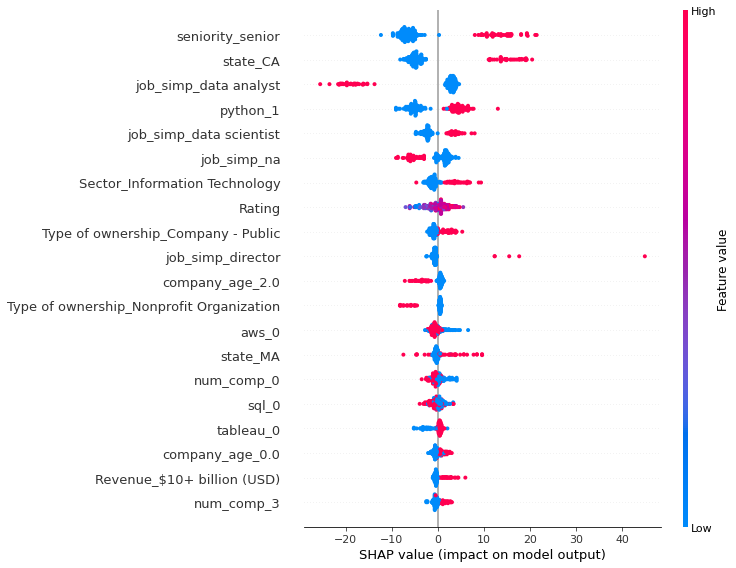

In [20]:
interpret_model(tunned_cat, plot = 'summary')

In [13]:
#RANDOM FOREST
rf= create_model('rf')
print(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,12.8436,321.3734,17.9269,0.7857,0.2067,0.1609
1,13.5444,404.8342,20.1205,0.6918,0.2248,0.1605
2,12.4795,339.4230,18.4234,0.7675,0.2061,0.1561
3,12.8940,369.7379,19.2286,0.6563,0.1886,0.1426
4,16.3786,547.6246,23.4014,0.6946,0.2048,0.1565
5,17.3817,644.6070,25.3891,0.4696,0.3184,0.2442
6,12.9032,363.8682,19.0753,0.6985,0.1875,0.1399
7,16.0902,431.2447,20.7664,0.5786,0.2011,0.1664
8,22.0255,1209.4235,34.7768,0.4556,0.3172,0.2457
9,14.3024,439.1063,20.9549,0.6167,0.2155,0.1478


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=16, verbose=0, warm_start=False)


In [16]:
tunned_rf = tune_model('rf')
print(tunned_rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,15.3621,384.3594,19.6051,0.7437,0.2167,0.1841
1,15.6392,472.0180,21.7260,0.6406,0.2413,0.1863
2,14.7758,417.2311,20.4262,0.7142,0.2257,0.1823
3,14.4954,399.4940,19.9873,0.6286,0.2053,0.1663
4,20.1436,744.6236,27.2878,0.5848,0.2352,0.1928
5,18.9933,649.5515,25.4863,0.4655,0.3234,0.2673
6,14.1047,365.5917,19.1205,0.6971,0.1890,0.1534
7,17.2695,443.6486,21.0630,0.5665,0.2045,0.1750
8,24.6987,1297.9757,36.0274,0.4157,0.3243,0.2646
9,16.6733,512.6450,22.6417,0.5526,0.2368,0.1790


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=9, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=16, verbose=0, warm_start=False)


In [21]:
plot_model(rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None
min_samples_leaf,1


In [22]:
bagged_cat = ensemble_model(tunned_cat)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,13.0390,340.3104,18.4475,0.7731,0.2140,0.1685
1,15.2180,509.1207,22.5637,0.6124,0.2588,0.1941
2,13.6704,440.5390,20.9890,0.6983,0.2331,0.1733
3,12.9887,377.2280,19.4224,0.6493,0.1915,0.1459
4,16.0397,533.4321,23.0961,0.7025,0.2012,0.1554
5,17.8081,636.0391,25.2198,0.4767,0.3200,0.2538
6,12.3163,316.0046,17.7765,0.7382,0.1694,0.1281
7,14.1762,338.8542,18.4080,0.6689,0.1725,0.1410
8,23.1810,1229.3393,35.0619,0.4466,0.3199,0.2584
9,15.7695,530.1816,23.0257,0.5373,0.2333,0.1678


In [23]:
blend_specific = blend_models(estimator_list = [tunned_cat, rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,10.7294,272.1396,16.4967,0.8185,0.1921,0.1382
1,12.7809,411.3359,20.2814,0.6868,0.2279,0.1592
2,11.5407,341.7873,18.4875,0.7659,0.2094,0.1483
3,11.3800,348.1569,18.6590,0.6763,0.1722,0.1201
4,14.3466,491.1043,22.1609,0.7261,0.1908,0.1365
5,17.1260,637.3529,25.2458,0.4756,0.3186,0.2424
6,11.1182,319.3662,17.8708,0.7354,0.1709,0.1175
7,14.1083,367.2018,19.1625,0.6412,0.1849,0.1443
8,21.1746,1160.3016,34.0632,0.4777,0.3142,0.2377
9,13.7503,475.5374,21.8068,0.5850,0.2209,0.1418


In [24]:
predict_model(blend_specific)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,11.5569,396.2426,19.9058,0.7157,0.1927,0.124


,Type of ownership_College / University,Industry_Social Assistance,job_simp_ml,state_ID,state_MN,state_UT,Industry_Video Games,state_SC,Industry_Security Services,Industry_Travel Agencies,Industry_K-12 Education,state_NJ,job_simp_director,aws_0,Industry_Accounting,Industry_Logistics & Supply Chain,Size_1 to 50 employees,Industry_Insurance Agencies & Brokerages,Type of ownership_Company - Private,Revenue_$5 to $10 million (USD),Revenue_$100 to $500 million (USD),Industry_Consulting,Industry_Trucking,num_comp_2,Industry_Wholesale,company_age_8.0,Industry_Sporting Goods Stores,Industry_IT Services,state_VA,Industry_Mining,Industry_Colleges & Universities,company_age_6.0,Revenue_$10 to $25 million (USD),state_DE,Type of ownership_Unknown,state_CT,state_KS,Industry_Motion Picture Production & Distribution,state_WA,hadoop_0,...,python_1,seniority_senior,job_simp_data engineer,Industry_Computer Hardware & Software,state_MA,Industry_Advertising & Marketing,Industry_Department Clothing & Shoe Stores,state_IN,tableau_0,state_NE,Revenue_Unknown / Non-Applicable,sql_0,state_NM,Industry_Transportation Management,Industry_Enterprise Software & Network Solutions,Sector_Media,num_comp_1,Revenue_$500 million to $1 billion (USD),Industry_Brokerage Services,Revenue_$25 to $50 million (USD),Revenue_Less than $1 million (USD),excel_0,job_simp_manager,Type of ownership_Hospital,state_IA,Sector_Mining & Metals,Sector_Information Technology,Industry_Food & Beverage Manufacturing,company_age_2.0,state_AZ,job_simp_data analyst,Industry_Construction,Industry_Financial Transaction Processing,Industry_Consumer Products Manufacturing,state_TX,Industry_Other Retail Stores,seniority_junior,Industry_Financial Analytics & Research,avg_sal,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,54.3069
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,60.7509
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,54.3792
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,131.7758
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,62.5952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.

In [25]:
final_model = finalize_model(blend_specific)

In [26]:
unseen_predictions = predict_model(final_model, data=df_unseen, round=0)
unseen_predictions.head()

,avg_sal,Rating,Size,Type of ownership,Industry,Sector,Revenue,hourly,emp_provided,state,same_state,company_age,python,sql,spark,java,tableau,excel,hadoop,powerbi,aws,nosql,num_comp,job_simp,seniority,Label
0,112.0,2.1,201 to 500 employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$25 to $50 million (USD),0,0,CA,1,-1,0,0,0,0,0,1,0,0,0,0,0,na,na,111.0
1,154.0,3.7,10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),0,0,MA,0,239,0,1,1,0,0,1,1,0,1,1,3,data engineer,na,152.0
2,95.0,3.4,201 to 500 employees,Company - Private,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,0,0,NY,0,9,1,1,1,0,1,0,0,0,1,0,2,data scientist,na,97.0
3,98.0,4.0,501 to 1000 employees,Company - Private,Consumer Product Rental,Consumer Services,Unknown / Non-Applicable,0,0,NY,1,13,1,1,0,0,0,1,0,0,0,0,2,data scientist,na,98.0
4,128.0,4.4,201 to 500 employees,Company - Private,Consulting,Business Services,$50 to $100 million (USD),0,0,IL,1,12,1,1,0,1,1,1,1,0,1,0,0,data scientist,senior,129.0


In [27]:
save_model(final_model, 'blended_rf_cat')

Transformation Pipeline and Model Succesfully Saved


In [28]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…